# Aprendizado por Reforço
## Exercı́cio 1: Programação Dinâmica
### Nome (Matricula)

In [25]:
import numpy as np
import copy, ex1
from ex1 import gridworld, plotv, observations

help(ex1)

Help on module ex1:

NAME
    ex1 - ELE2761 Exercise 1: Dynamic Programming.

DESCRIPTION
    Implements the provided functionality to be used in your solution.
    
    FUNCTIONS
        gridworld    -- Grid world environment.
        observations -- Efficiency analysis.
        plotv        -- Value function plotting.

FUNCTIONS
    gridworld(s, a)
        Grid world from Sutton & Barto, example 3.8.
        
        r, sp = gridworld(s, a) returns the reward r and next state sp when
        starting in state s and taking action a. 0 <= s, sp < 25, 0 <= a < 4
        
        ACTIONS
            0 -- up
            1 -- down
            2 -- right
            3 -- left
    
    observations()
        Returns number of gridworld observations since last call.
        
        NOTE
            Make sure to reset the count by calling this function before
            calling the function you want to analyse.
    
    plotv(v)
        Plot grid world value function and induced policy.
    

**Exercise 1.1** Implement policy evaluation for the grid world. Use $\theta = 10^{−5}$ as
the stopping criterion and $\gamma = 0.9$.

observations: 3325


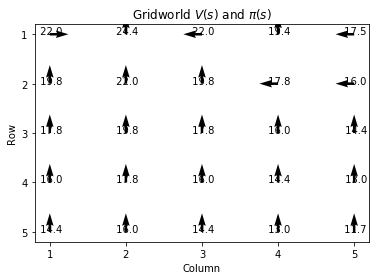

In [414]:
#FUNÇÃO POLICY EVALUATION
def policy_evaluation(policy, theta, gamma, value_old):
    while True:
        value_new = np.zeros(25) #novos valores de estados inicializados em 0 em cada sweep
        delta = 0                #reinicializar erro do aprendizado
        
        for state in range(len(value_new)):   #loop de estados
            reward, next_state = gridworld(state, policy[state])            #retorno do reward e próximo estado de cada ação no estado atual
            value_new[state] = reward + gamma*value_old[next_state] #novo valor do estado é atualizado para cada ação calculada
        #fim do loop de estados(sweep)
        
        delta = max(abs(value_new - value_old)) #calculo do erro relativo ao valor alcançado no sweep (ao se passar por todos os estados)

        if delta < theta:      #se o erro é menor que o limiar (critério de parada), terminar o loop mais externo
            break
        
        value_old = np.copy(value_new)
        
    return value_new, it


###############################################################

policy = np.full(25,0)   #política de ações (determinística)
theta = 10**-5           #critério de parada
gamma = 0.9              #valor de desconto
value_old = np.zeros(25) #inicialização dos Valores de estados (V(s)) no vetor -> todos 0

observations()

value_map, it = policy_evaluation(policy, theta, gamma, value_old)

print('observations: ' + str(observations()))

plotv(value_new)           #plota o gridworld com seus respectivos estados e valores de estado

<br>
<br>
<br>
<br>

**Exercise 1.2** Implement the policy improvement step, and run the algorithm. Verify that the results are the same as Figure 3.8 in the book (use `plotv`). How many observations did it take to converge?

Não convergiu ainda!

Não convergiu ainda!

Não convergiu ainda!

Não convergiu ainda!

Convergiu!
Observations: 6500


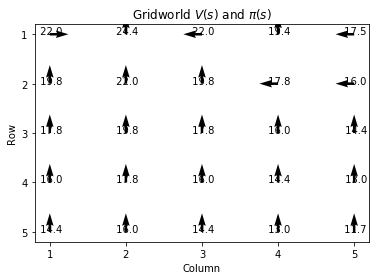

In [419]:
#FUNÇÃO POLICY EVALUATION
def policy_evaluation(policy, theta, gamma, value_old):

    while True:
        value_new = np.zeros(25) #novos valores de estados inicializados em 0 em cada sweep
        delta = 0                #reinicializar erro do aprendizado
        for state in range(len(value_new)):   #loop de estados
            reward, next_state = gridworld(state, policy[state])            #retorno do reward e próximo estado de cada ação no estado atual
            value_new[state] = reward + gamma*value_old[next_state] #novo valor do estado é atualizado para cada ação calculada 
        #fim do loop de estados(sweep)
        delta = max(abs(value_new - value_old)) #calculo do erro relativo ao valor alcançado no sweep (ao se passar por todos os estados)
        if delta < theta:      #se o erro é menor que o limiar, terminar o loop mais externo
            break
        value_old = np.copy(value_new)
    return value_new


#FUNÇÃO POLICY IMPROVEMENT
def policy_improvement(policy, theta, gamma, value_old):
    policy_new = np.zeros(len(value_old))
    value_state = np.zeros(4)
    
    while True:
        policy_stable = True
        value = policy_evaluation(policy, theta, gamma, value_old)
        
        for state in range(len(value)):
            old_action = policy[state]
            
            for action in range(4):
                reward, next_state = gridworld(state, action)
                value_state[action] = reward + gamma*value[next_state]
            #fim do loop de ações
            
            policy_new[state] = np.argmax(value_state)
            
            if old_action != policy_new[state]:
                policy_stable = False
        #fim do loop de estados

        if policy_stable:
            print('Convergiu!')
            return value, policy_new
        else:
            policy = np.copy(policy_new)
            value_old = np.copy(value_new)
            print('Não convergiu ainda!\n')
    

############################################################

policy = np.full(25,0)   #política de ações (determinística)
theta = 10**-5           #critério de parada
gamma = 0.9              #valor de desconto
value_old = np.zeros(25) #inicialização dos Valores de estados (V(s)) no vetor -> todos 0

observations()

value_map , policy_new = policy_improvement(policy, theta, gamma, value_old)

print('Observations: ' + str(observations()))

plotv(value_map)

Answer: 

It took 6500 observations to converge.
<br>
<br>
<br>
<br>

**Exercise 1.3** Use a value of $\gamma = 0.8$. What changes in the resulting policy? How about the required number of observations?

Não convergiu ainda!


Não convergiu ainda!


Convergiu!
Observations: 4725


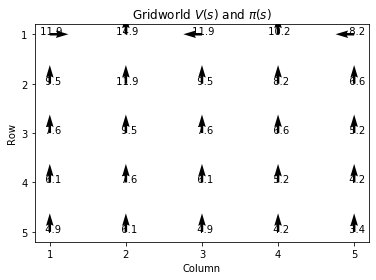

In [420]:
#FUNÇÃO POLICY EVALUATION
def policy_evaluation(policy, theta, gamma, value_old):

    while True:
        value_new = np.zeros(25) #novos valores de estados inicializados em 0 em cada sweep
        delta = 0                #reinicializar erro do aprendizado
        for state in range(len(value_new)):   #loop de estados
            reward, next_state = gridworld(state, policy[state])            #retorno do reward e próximo estado de cada ação no estado atual
            value_new[state] = reward + gamma*value_old[next_state] #novo valor do estado é atualizado para cada ação calculada 
        #fim do loop de estados(sweep)
        delta = max(abs(value_new - value_old)) #calculo do erro relativo ao valor alcançado no sweep (ao se passar por todos os estados)
        if delta < theta:      #se o erro é menor que o limiar, terminar o loop mais externo
            break
        value_old = np.copy(value_new)
    return value_new


#FUNÇÃO POLICY IMPROVEMENT
def policy_improvement(policy, theta, gamma, value_old):
    policy_new = np.zeros(len(value_old))
    value_state = np.zeros(4)
    
    while True:
        policy_stable = True
        value = policy_evaluation(policy, theta, gamma, value_old)
        
        for state in range(len(value)):
            
            old_action = policy[state]
            
            for action in range(4):
                reward, next_state = gridworld(state, action)
                value_state[action] = reward + gamma*value[next_state]
            #fim do loop de ações
            
#             print('estado ' + str(state) + 'ANTES de argmax')#RETIRAR
#             print(np.reshape(policy, (5,5)))#RETIRAR
            policy_new[state] = np.argmax(value_state)   #COMPORTAMENTO ESTRANHO NESSA LINHA - POR ALGUM MOTIVO ELA ALTERA A VARIAVEL policy
#             print('estado ' + str(state) + 'DEPOIS de argmax')#RETIRAR
#             print(np.reshape(policy, (5,5)))#RETIRAR
            
            if old_action != policy_new[state]:
                policy_stable = False
            
        #fim do loop de estados
        
#         print('Policy:' )                #linhas retiradas pelo comportamento estranho no loop de ações
#         print(np.reshape(policy, (5,5))) #ao se atualizar policy_new, a variavel policy também é alterada
     
        if policy_stable:
            print('Convergiu!')
            return value, policy_new
        else:
            policy = np.copy(policy_new)
            value_old = np.copy(value_new)
            print('Não convergiu ainda!\n\n')
    

############################################################

policy = np.full(25,0)   #política de ações (determinística)
theta = 10**-5           #critério de parada
gamma = 0.8              #valor de desconto
value_old = np.zeros(25) #inicialização dos Valores de estados (V(s)) no vetor -> todos 0

observations()

value_map , policy_new = policy_improvement(policy, theta, gamma, value_old)

print('Observations: ' + str(observations()))

plotv(value_map)

Answer:

Like explained in the exercise 1 sheet, "gamma is a measure of how much in the future the algorithm looks". Therefore, decreasing this parameter, and with that, the ability to look as far in the future as exercise 1.2, the resulting policy changes in row 2, columns 4 and 5. The actions for those states now point up, "missing" a greater value in the future, found in state 1 (row 1, column 2).

In comparison to exercise 1.2, The number of observations decreased. This happens due to the smaller gamma, that affects the maximum number of iterations needed to converge. A smaller gamma needs fewer iterations.There are 4725 observations now. 
<br>
<br>
<br>
<br>


**Exercise 1.4** Implement value iteration. Since plotv already computes $\pi$ from $V$, you can skip the last two lines of Figure 4.5 in the book. Verify that the results are the same as using policy iteration. How many observations did it take this time?

Observations: 13300


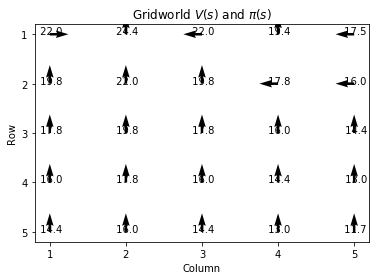

In [425]:
#FUNÇÃO VALUE ITERATION
def value_iteration(theta, gamma, value_old):
    value_new = np.zeros(25)  #novos valores de estados inicializados em 0
    value_state = np.zeros(4) #valores para cada ação em cada estado
    
    while True:
        delta = 0                 #reinicializar erro do aprendizado
        
        for state in range(len(value_new)):   #loop de valores
            for action in range(len(value_state)):
                reward, next_state = gridworld(state, action)              #retorno do reward e próximo estado de cada ação no estado atual
                value_state[action] = reward + gamma*value_old[next_state] #valores do estado atual para cada ação 
            #fim do loop de ações
            best_action = np.argmax(value_state)
            value_new[state] = value_state[best_action]
        #fim do loop de estados(sweep)
        
        delta = max(abs(value_new - value_old)) #calculo do erro relativo ao valor alcançado no sweep (ao se passar por todos os estados)
        
        if delta < theta:      #se o erro é menor que o limiar (critério de parada), terminar o loop mais externo
            return value_new
        
        value_old = np.copy(value_new)
    
################################################################

theta = 10**-5           #critério de parada
gamma = 0.9              #valor de desconto
value_old = np.zeros(25) #inicialização dos Valores de estados (V(s)) no vetor -> todos 0

observations()

value_map = value_iteration(theta, gamma, value_old)

print('Observations: ' + str(observations()))

plotv(value_map)


Answer:

The results are the same as policy iteration, using gamma = 0.8.

It took 13300 observations to converge.
<br>
<br>
<br>
<br>

**Exercise 1.5** Implement asynchronous value iteration by modifying your value iteration loop to have a fixed number of 250 iterations, and choosing s randomly for each iteration (use `randi`). Verify that only 1000 observations are made and compare the resulting $V$ with the $V^∗$ you found in the earlier exercises. Also compare the policies, and explain the results.

Observations: 1000


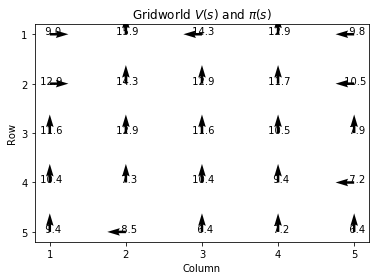

In [433]:
#FUNÇÃO VALUE ITERATION
def value_iteration(theta, gamma, value_old):
    value_new = np.zeros(25)  #novos valores de estados inicializados em 0 em cada sweep
    value_state = np.zeros(4) #valores para cada ação em cada estado

    for state in range(250):   #loop de valores
        state = np.random.randint(0, 25)
        for action in range(len(value_state)):
            reward, next_state = gridworld(state, action)              #retorno do reward e próximo estado de cada ação no estado atual
            value_state[action] = reward + gamma*value_new[next_state] #valores do estado atual para cada ação 
        #fim do loop de ações
        best_action = np.argmax(value_state)
        value_new[state] = value_state[best_action]
    #fim do loop de estados(sweep)

    delta = max(abs(value_new - value_old)) #calculo do erro relativo ao valor alcançado no sweep (ao se passar por todos os estados)


    return value_new

    
################################################################

theta = 10**-5           #critério de parada
gamma = 0.9              #valor de desconto
value_old = np.zeros(25) #inicialização dos Valores de estados (V(s)) no vetor -> todos 0

observations()

value_map = value_iteration(theta, gamma, value_old)

print('Observations: ' + str(observations()))

plotv(value_map)


Answer:

The number of observations were 1000.

The resulting V is different from previous exercises, and different in every run of the algorithm. This happens due to the randomness of this method, although if we visit all the states an infinite number of times, the convergence will happen.

Policies vary accordingly with the states chosen. In that way, again, for each exercise 1.5 algorithm execution, the resulting policie will be different because 250 random states is not enough to converge. if much more states were visited randomly, it is more likely that the results obtained for different runs would be the same.